<h1> Genius AI Solutions </h1>
Machine Learning internship


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns

In [2]:
df = pd.read_csv("taskdata.csv")

In [3]:
df.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


In [4]:
#df.describe()

In [5]:
#df.shape

In [6]:
#df.columns

In [7]:
#df.info()

In [8]:
#df.nunique()

<H1> EDA </H1>

<p><h3>cleaning the data</h3></p>

<h6>removing  useless columns</h6>
<p> here user_id and account_id is of no use</p>

In [9]:
df = df.drop(["user_id","account_id"], axis = 1)

In [10]:
df.head()

,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


In [11]:
df.shape

(4407, 15)

<h3> Handling Null Values <h3>

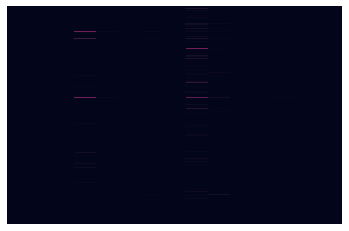

In [12]:
sns.heatmap(df,cbar=False,xticklabels = False,yticklabels = False)

In [13]:
df.isnull().sum()

max_return_days          0
average_return_days      0
customer_since_months    0
total_revenue            0
average_revenue          0
avg_vas_count            0
avg_used_vas_value       0
business_type            0
avg_wallet_bonus         0
avg_active_ads           0
avg_new_ads              0
avg_email_replies        0
avg_call_replies         0
avg_sms_replies          0
target                   0
dtype: int64

<h2>no missing values</h2>

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.iloc[:,:-1]
y = df["target"]

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [17]:
df.quantile()

max_return_days           2.000000
average_return_days       1.076923
customer_since_months    12.000000
total_revenue             0.000000
average_revenue           0.000000
avg_vas_count             2.000000
avg_used_vas_value       45.000000
business_type             0.000000
avg_wallet_bonus         40.000000
avg_active_ads           40.000000
avg_new_ads               6.333333
avg_email_replies        12.266667
avg_call_replies         12.933333
avg_sms_replies           0.000000
target                    0.000000
Name: 0.5, dtype: float64

<h1> feature selection </h1>

In [18]:
from sklearn.ensemble import ExtraTreesClassifier

In [19]:
forest = ExtraTreesClassifier()

In [20]:
forest.fit(X,y)

ExtraTreesClassifier()

In [21]:
importances = forest.feature_importances_

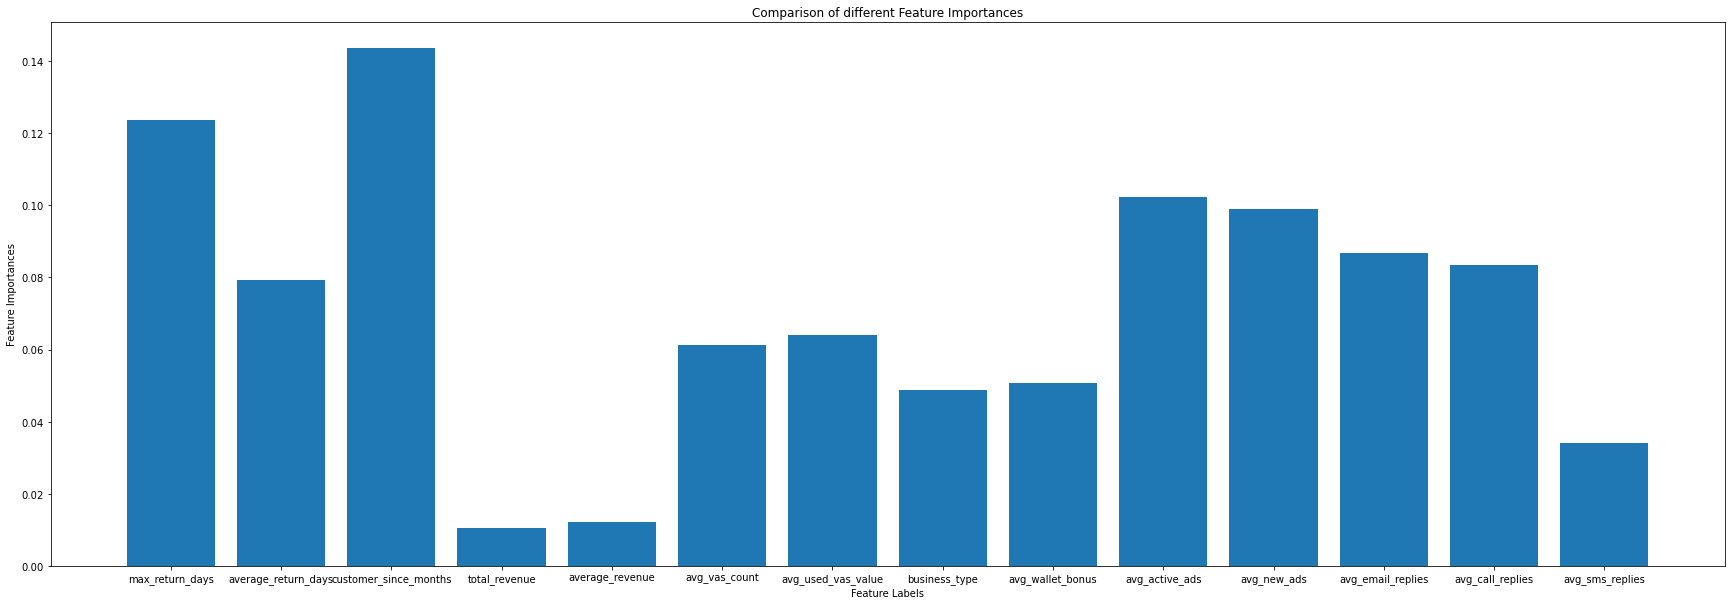

In [22]:
plt.figure(figsize=(30,10))
plt.bar(X.columns, importances) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 

from feature importance "total revenue" and "average revenue" features as less importance so we can drop it

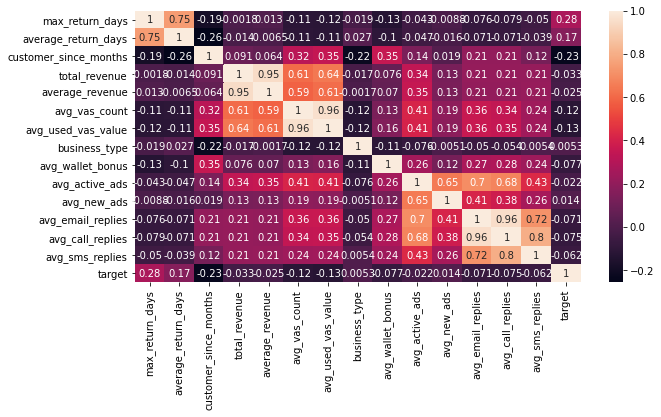

In [23]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

from correlation avg_vas_count, avg_used_vas_score as highest correlation so we can take either one

In [24]:
df = df.drop(["average_revenue","avg_vas_count"], axis = True)

In [25]:
df.head()

,max_return_days,average_return_days,customer_since_months,total_revenue,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,8,1.500000,14,0.0,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,37,8.200000,10,0.0,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,9,1.533333,15,0.0,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,1,1.000000,14,0.0,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,1,1.000000,18,0.0,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


In [26]:
df.columns

Index(['max_return_days', 'average_return_days', 'customer_since_months',
       'total_revenue', 'avg_used_vas_value', 'business_type',
       'avg_wallet_bonus', 'avg_active_ads', 'avg_new_ads',
       'avg_email_replies', 'avg_call_replies', 'avg_sms_replies', 'target'],
      dtype='object')

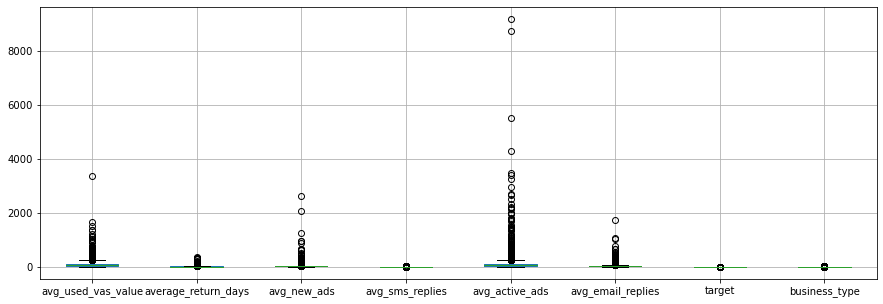

In [27]:
col =["avg_used_vas_value","average_return_days","avg_new_ads","avg_sms_replies","avg_active_ads",
      "avg_email_replies","target","business_type"]
plt.figure(figsize=(15,5))
df[col].boxplot()
plt.show()


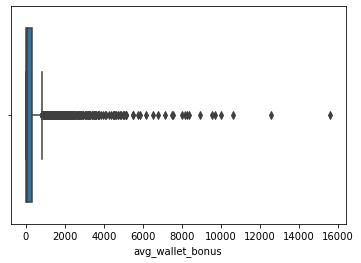

In [28]:

sns.boxplot("avg_wallet_bonus",data=df)


In [29]:
df = df[df.avg_active_ads <= 400]
df = df[df.avg_used_vas_value <= 750]

In [30]:
df.shape

(4256, 13)

In [31]:
#sns.pairplot(df)

<h2> deriving new features </h2>

In [32]:
df.customer_since_months.unique()

array([14, 10, 15, 18, 11, 16,  5,  2, 13,  3,  9, 12, 21, 17,  7,  6,  4,
        1, 19,  8, 24, 20, 23], dtype=int64)

customer_since_months is No of months since user started paying 
from this we derived a new feature as exp_pay where below 12 months referred as not experinces and 
above is refered as more experinced 

In [33]:
def experinces_payers(df):
    if df["customer_since_months"]<12:
        return 0
    else:
        return 1
    
X["exp_pay"]= X.apply(lambda df:experinces_payers(df), axis = 1)


avg_active_ads is a total number of active ads range from 0 to 398 
from this we derived a new feature as less_more_adds where below 80 referred as less ads and 
above is refered as more ads 

In [35]:
def revenue(df):
    if df["avg_active_ads"] < 80:
        return 0
    else:
        return 1
    
X['less_more_adds']= X.apply(lambda df:revenue(df), axis = 1)


In [36]:
X.head()

,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,exp_pay,less_more_adds
0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,1,0
1,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0,1
2,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,1,0
3,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1,1
4,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,1,0


<h1> model building </h1> 

In [37]:
df["target"].value_counts()

0    3822
1     434
Name: target, dtype: int64

from this we can clearly observe that the data set is imbalance 
so we can do over sampling are under sampling

In [38]:
from xgboost import XGBClassifier

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
from imblearn.over_sampling import RandomOverSampler

In [41]:
rs =RandomOverSampler()

In [42]:
X_train_rs,y_train_rs = rs.fit_sample(X_train,y_train)

In [43]:
model = XGBClassifier()

In [44]:
model.fit(X_train_rs,y_train_rs)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
pred = model.predict(X_test)

In [47]:
predictions = [round(value) for value in pred]

In [48]:
accuracy_score(y_test,predictions)

0.8968253968253969

we are getting 89 persent by doing hyperparameter tuning we can improve accuracy